# Amino Acid Group Scoring
Append scores for amino acid groupings by 'protein' EID

Working functions in this notebook:
   1. count_aa_types
   2. aa_to_df
   3. viz_aa_groups(nonpolar, positive, polar, negative)
  
Working tests in this notebook:
   1. test_count_aa_types
   2. test_aa_to_df

In [1]:
# Imports

import math
import pandas as pd
import matplotlib.pyplot as plt

### I've imported only 10 rows to work with, change this for the real data

In [54]:
# Import data to append to
data = pd.read_csv('GI_Numbers_combo.csv', nrows=11)
data

,Unnamed: 0,GENENAME,ORG,ENTREZID,REFSEQ,LOG2FC,True_EID
0,0,ABC_transporter,PA,879411,NP_248876,-0.038469,15595384
1,1,ABC_transporter,PA,883108,NP_248894,-0.207718,15595400
2,2,ABC_transporter,PA,878380,NP_249014,-0.187309,15595520
3,3,ABC_transporter,PA,880771,NP_249293,0.085173,15595799
4,4,ABC_transporter,PA,879023,NP_249295,0.038834,15595801
5,5,ABC_transporter,PA,879321,NP_250033,0.224284,15596539
6,6,ABC_transporter,PA,880658,NP_250501,0.007856,15597007
7,7,ABC_transporter,PA,878515,NP_250748,0.048694,15597254
8,8,ABC_transporter,PA,877884,NP_250894,-0.101874,15597400
9,9,ABC_transporter,PA,878805,NP_252578,-0.020607,15599084


### Append FASTA sequences, label column as 'SEQUENCE'

Here I make up data for FASTA sequences

In [10]:
fasta = ['ALKNRRTV', 'AQWWWQP', 'DFITNML', 'ALAK', 'KING', 'CIYRREMWLNLATD', 'FDTWMNQI', 'PMPSKSL', 'TFGSRECVPDSLIE', 'CATS', 'PLGA']

In [57]:
data['SEQUENCE'] = pd.DataFrame(fasta)
data

,Unnamed: 0,GENENAME,ORG,ENTREZID,REFSEQ,LOG2FC,True_EID,SEQUENCE
0,0,ABC_transporter,PA,879411,NP_248876,-0.038469,15595384,ALKNRRTV
1,1,ABC_transporter,PA,883108,NP_248894,-0.207718,15595400,AQWWWQP
2,2,ABC_transporter,PA,878380,NP_249014,-0.187309,15595520,DFITNML
3,3,ABC_transporter,PA,880771,NP_249293,0.085173,15595799,ALAK
4,4,ABC_transporter,PA,879023,NP_249295,0.038834,15595801,KING
5,5,ABC_transporter,PA,879321,NP_250033,0.224284,15596539,CIYRREMWLNLATD
6,6,ABC_transporter,PA,880658,NP_250501,0.007856,15597007,FDTWMNQI
7,7,ABC_transporter,PA,878515,NP_250748,0.048694,15597254,PMPSKSL
8,8,ABC_transporter,PA,877884,NP_250894,-0.101874,15597400,TFGSRECVPDSLIE
9,9,ABC_transporter,PA,878805,NP_252578,-0.020607,15599084,CATS


### Amino acid group dictionaries

In [1]:
# I have named this dictionary ninja, based on the source I got the information on groupings from
ninja = {
    'nonpolar': ['G', 'g', 'A', 'a', 'V', 'v', 'C', 'c', 'P', 'p', 'L', 'l', 'I', 'i', 'M', 'm', 'W', 'w', 'F', 'f'],
    'positive': ['K', 'k', 'R', 'r', 'H', 'h'],
    'polar': ['S', 's', 'T', 't', 'Y', 'y', 'N', 'n', 'Q', 'q'],
    'negative': ['D', 'd', 'E', 'e']
}

### Initiate lists for group counts per gene

In [22]:
nonpolar = []
positive = []
polar = []
negative = []

In [20]:
sequence = ['AARNPDWEK']
seq = sequence[0]
len(seq)
seq[3]

'N'

## Function to append to lists per entry

In [10]:
def count_aa_types(sequence):
    '''here, sequence is an element in a list, not a list itself
    Function takes the sequence, counts how many times amino acids occur per each of 4 
    groups and returns values as percentages of the total amino acides in the sequence'''
    l = len(sequence)
    
    ninja = {
        'nonpolar': ['G', 'g', 'A', 'a', 'V', 'v', 'C', 'c', 'P', 'p', 'L', 'l', 'I', 'i', 'M', 'm', 'W', 'w', 'F', 'f'],
        'positive': ['K', 'k', 'R', 'r', 'H', 'h'],
        'polar': ['S', 's', 'T', 't', 'Y', 'y', 'N', 'n', 'Q', 'q'],
        'negative': ['D', 'd', 'E', 'e']
    }
    
    # Initiate lists for counts
    nonpolar_l = []
    positive_l = []
    polar_l = []
    negative_l = []
    
    for i in range(l):
        aa = sequence[i]
        if aa in ninja['nonpolar']:
            nonpolar_l.append(1)
        elif aa in ninja['positive']:
            positive_l.append(1)
        elif aa in ninja['polar']:
            polar_l.append(1)
        else:
            negative_l.append(1)
            
    # Sum the lists to return
    nonpolar_c = sum(nonpolar_l)
    positive_c = sum(positive_l)
    polar_c = sum(polar_l)
    negative_c = sum(negative_l)
    
    # Percentage calculation to return
    nonpolar = nonpolar_c / l *100
    positive = positive_c / l *100
    polar = polar_c / l *100
    negative = negative_c / l *100
    
    return nonpolar, positive, polar, negative

In [6]:
# Test
sequence = ['AARNPDWEK']
seq = sequence[0]
len(seq)
seq[3]

#Initiate lists for function
nonpolar = []
positive = []
polar = []
negative = []

#Use function
nonpo, pos, pol, neg = count_aa_types(seq)
print(nonpo)
print(pos)
print(pol)
print(neg)

44.44444444444444
22.22222222222222
11.11111111111111
22.22222222222222


### Test function

In [3]:
def test_count_aa_types():
    sequence = ['AARNPDWEK']
    seq = sequence[0]
    len(seq)
    seq[3]

    #Use function
    nonpo, pos, pol, neg = count_aa_types(seq)
    expect = 22
    
    assert math.isclose(pos, 22.22222222), 'the count_aa_types function does not work'
    return

In [4]:
test_count_aa_types()

NameError: name 'count_aa_types' is not defined

## Function to use count function on entire DataFrame

In [5]:
def aa_to_df(df):
    """
    Takes-in dataframe with column called 'SEQUENCE', counts the amino acids per each gene for each amino acid type
    Returns dataframe with appended columns for counted amino acids per group as percentage of total for that gene
    """
    
    # Initiate results lists
    nonpolar = []
    positive = []
    polar = []
    negative = []
    
    # Use count_aa_types function for each element of 'SEQUENCE' column of dataframe
    length = len(df)
    for i in range(length):
        nonpo, pos, pol, neg = count_aa_types(df['SEQUENCE'][i])
        nonpolar.append(nonpo)
        positive.append(pos)
        polar.append(pol)
        negative.append(neg)

    # Append results lists to columns of dataframe
    df['AA_NP'] = pd.DataFrame(nonpolar)
    df['AA_POS'] = pd.DataFrame(positive)
    df['AA_POL'] = pd.DataFrame(polar)
    df['AA_NEG'] = pd.DataFrame(negative)
    
    return df

In [64]:
data = pd.read_csv('GI_Numbers_combo.csv', nrows=11)
fasta = ['ALKNRRTV', 'AQWWWQP', 'DFITNML', 'CIYRREMWLNLATD', 'FDTWMNQI', 'PMPSKSL', 'TFGSRECVPDSLIE', 'CATS', 'GEWLIA', 'A', 'KING']
data['SEQUENCE'] = pd.DataFrame(fasta)
data

,Unnamed: 0,GENENAME,ORG,ENTREZID,REFSEQ,LOG2FC,True_EID,SEQUENCE
0,0,ABC_transporter,PA,879411,NP_248876,-0.038469,15595384,ALKNRRTV
1,1,ABC_transporter,PA,883108,NP_248894,-0.207718,15595400,AQWWWQP
2,2,ABC_transporter,PA,878380,NP_249014,-0.187309,15595520,DFITNML
3,3,ABC_transporter,PA,880771,NP_249293,0.085173,15595799,CIYRREMWLNLATD
4,4,ABC_transporter,PA,879023,NP_249295,0.038834,15595801,FDTWMNQI
5,5,ABC_transporter,PA,879321,NP_250033,0.224284,15596539,PMPSKSL
6,6,ABC_transporter,PA,880658,NP_250501,0.007856,15597007,TFGSRECVPDSLIE
7,7,ABC_transporter,PA,878515,NP_250748,0.048694,15597254,CATS
8,8,ABC_transporter,PA,877884,NP_250894,-0.101874,15597400,GEWLIA
9,9,ABC_transporter,PA,878805,NP_252578,-0.020607,15599084,A


In [65]:
data = aa_to_df(data)
data

,Unnamed: 0,GENENAME,ORG,ENTREZID,REFSEQ,LOG2FC,True_EID,SEQUENCE,AA_NP,AA_POS,AA_POL,AA_NEG
0,0,ABC_transporter,PA,879411,NP_248876,-0.038469,15595384,ALKNRRTV,37.500000,37.500000,25.000000,0.000000
1,1,ABC_transporter,PA,883108,NP_248894,-0.207718,15595400,AQWWWQP,71.428571,0.000000,28.571429,0.000000
2,2,ABC_transporter,PA,878380,NP_249014,-0.187309,15595520,DFITNML,57.142857,0.000000,28.571429,14.285714
3,3,ABC_transporter,PA,880771,NP_249293,0.085173,15595799,CIYRREMWLNLATD,50.000000,14.285714,21.428571,14.285714
4,4,ABC_transporter,PA,879023,NP_249295,0.038834,15595801,FDTWMNQI,50.000000,0.000000,37.500000,12.500000
5,5,ABC_transporter,PA,879321,NP_250033,0.224284,15596539,PMPSKSL,57.142857,14.285714,28.571429,0.000000
6,6,ABC_transporter,PA,880658,NP_250501,0.007856,15597007,TFGSRECVPDSLIE,50.000000,7.142857,21.428571,21.428571
7,7,ABC_transporter,PA,878515,NP_250748,0.048694,15597254,CATS,50.000000,0.000000,50.000000,0.000000
8,8,ABC_transporter,PA,877884,NP_250894,-0.101874,15597400,GEWLIA,83.333333,0.000000,0.000000,16.666667
9,9,ABC_transporter,PA,878805,NP_252578,-0.020607,15599084,A,100.000000,0.000000,0.000000,0.000000


## Test aa_to_df Function

In [6]:
def test_aa_to_df():
    # Initiate dataframe for test function
    fasta = ['ALKNRRTV', 'AQWWWQP', 'DFITNML', 'CIYRREMWLNLATD', 'FDTWMNQI', 'PMPSKSL', 'TFGSRECVPDSLIE', 'CATS', 'GEWLIA', 'A', 'KING']
    df = pd.DataFrame(fasta, columns=['SEQUENCE'])
    
    # Test the function
    df = aa_to_df(df)
    result = df['AA_NEG'][0]
    expect = 0
    assert math.isclose(result, expect), 'The test_aa_to_df function does not work properly.'

In [7]:
test_aa_to_df()

## Visualize amino acid groups in sequence

In [58]:
def viz_aa_groups(nonpolar, positive, polar, negative):
    """
    Visualization for the amino acid groups in a sequence.  Inputs should be as a percentage.
    """
    
    labels = 'Nonpolar', 'Positive', 'Polar', 'Negative'
    sizes = [nonpolar, positive, polar, negative]
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.0f%%', colors=['cornflowerblue', 'mediumaquamarine', 
                                                            'yellowgreen', 'palegoldenrod'])
    ax.axis('equal')
    plt.rcParams.update({'font.size': 14})
    plt.show()
    
    return fig

In [56]:
nonpolar, positive, polar, negative = count_aa_types(seq)

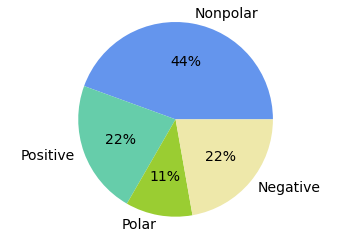

In [57]:
figure = viz_aa_groups(nonpolar, positive, polar, negative)

## Weird stuff is below this cell

In [68]:
fasta = ['ALKNRRTV', 'AQWWWQP', 'DFITNML', 'CIYRREMWLNLATD', 'FDTWMNQI', 'PMPSKSL', 'TFGSRECVPDSLIE', 'CATS', 'GEWLIA', 'A', 'KING']
df = pd.DataFrame(fasta, columns=['SEQUENCE'])
df

,SEQUENCE
0,ALKNRRTV
1,AQWWWQP
2,DFITNML
3,CIYRREMWLNLATD
4,FDTWMNQI
5,PMPSKSL
6,TFGSRECVPDSLIE
7,CATS
8,GEWLIA
9,A


In [49]:
# Initiate results lists
nonpolar = []
positive = []
polar = []
negative = []

nonpo, pos, pol, neg = count_aa_types(seq)

length = len(data)
for i in range(length):
    nonpo, pos, pol, neg = count_aa_types(data['SEQUENCE'][i])
    nonpolar.append(nonpo)
    positive.append(pos)
    polar.append(pol)
    negative.append(neg)

# Append results lists to columns of dataframe
data['AA_NP'] = pd.DataFrame(nonpolar)
data['AA_POS'] = pd.DataFrame(positive)
data['AA_POL'] = pd.DataFrame(polar)
data['AA_NEG'] = pd.DataFrame(negative)
data

,Unnamed: 0,GENENAME,ORG,ENTREZID,REFSEQ,LOG2FC,True_EID,SEQUENCE,AA_NP,AA_POS,AA_POL,AA_NEG
0,0,ABC_transporter,PA,879411,NP_248876,-0.038469,15595384,ALKNRRTV,37.500000,37.500000,25.000000,0.000000
1,1,ABC_transporter,PA,883108,NP_248894,-0.207718,15595400,AQWWWQP,71.428571,0.000000,28.571429,0.000000
2,2,ABC_transporter,PA,878380,NP_249014,-0.187309,15595520,DFITNML,57.142857,0.000000,28.571429,14.285714
3,3,ABC_transporter,PA,880771,NP_249293,0.085173,15595799,ALAK,75.000000,25.000000,0.000000,0.000000
4,4,ABC_transporter,PA,879023,NP_249295,0.038834,15595801,KING,50.000000,25.000000,25.000000,0.000000
5,5,ABC_transporter,PA,879321,NP_250033,0.224284,15596539,CIYRREMWLNLATD,50.000000,14.285714,21.428571,14.285714
6,6,ABC_transporter,PA,880658,NP_250501,0.007856,15597007,FDTWMNQI,50.000000,0.000000,37.500000,12.500000
7,7,ABC_transporter,PA,878515,NP_250748,0.048694,15597254,PMPSKSL,57.142857,14.285714,28.571429,0.000000
8,8,ABC_transporter,PA,877884,NP_250894,-0.101874,15597400,TFGSRECVPDSLIE,50.000000,7.142857,21.428571,21.428571
9,9,ABC_transporter,PA,878805,NP_252578,-0.020607,15599084,CATS,50.000000,0.000000,50.000000,0.000000
